In [1]:
import numpy as np
import matplotlib.pyplot as plt

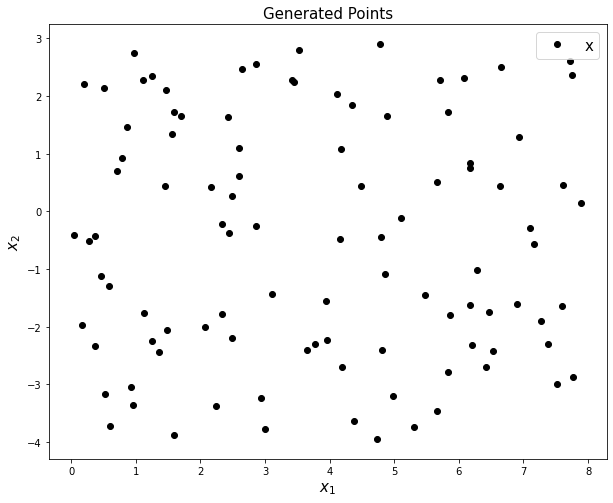

In [3]:
np.random.seed(42)

m = 100
x1 = 8*np.random.rand(m, 1)
x2 = 7*np.random.rand(m, 1) - 4

g = 0.8*x1 + x2 - 3

plt.figure(figsize=(10, 8))
plt.plot(x1, x2, "ko", label="x")
plt.title("Generated Points", fontsize=15)
plt.legend(loc=1, fontsize=15)
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$x_2$", fontsize=15)
plt.show()

In [4]:
C0 = np.where(g<-1)
C1 = np.where(g>=1)
print(C1)

(array([ 1,  7, 12, 18, 20, 25, 27, 33, 34, 39, 50, 53, 54, 62, 65, 69, 70,
       74, 76, 78, 82, 86, 88, 91, 92, 93, 96, 97]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0]))


In [6]:
C0 = np.where(g<-1)[0]
C1 = np.where(g>=1)[0]

print(C0.shape)
print(C1.shape)

(40,)
(28,)


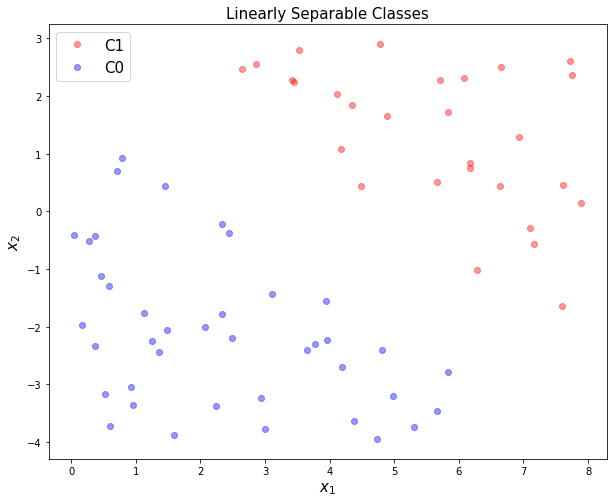

In [9]:
plt.figure(figsize=(10, 8))
plt.plot(x1[C1], x2[C1], "ro", alpha=0.4, label="C1")
plt.plot(x1[C0], x2[C0], "bo", alpha=0.4, label="C0")
plt.title("Linearly Separable Classes", fontsize=15)
plt.legend(loc=2, fontsize=15)
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$x_2$", fontsize=15)
plt.show()

In [14]:
w = np.ones([3, 1])
w = np.asmatrix(w)

X1 = np.hstack([np.ones([C1.shape[0], 1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([C0.shape[0], 1]), x1[C0], x2[C0]])
X = np.vstack([X1, X0])
y = np.vstack([np.ones([C1.shape[0], 1]), -np.ones([C0.shape[0],1])])

X = np.asmatrix(X)
y = np.asmatrix(y)

In [16]:
n_iter = y.shape[0]
epoch = 10

for k in range(epoch):
    for i in range(n_iter):
        if y[i, 0] != np.sign(X[i,:]*w)[0, 0]:
            w += y[i, 0]*X[i, :].T
    now_loss = 0
    
    for i in range(n_iter):
        now_loss += max(0, -y[i, 0]*(X[i,:]*w)[0])
    
    print("iteration: ", k+1, "Loss: ", now_loss)

print(w)

iteration:  1 Loss:  [[325.85403761]]
iteration:  2 Loss:  [[253.60306948]]
iteration:  3 Loss:  [[193.71128743]]
iteration:  4 Loss:  [[162.71384086]]
iteration:  5 Loss:  [[138.06956629]]
iteration:  6 Loss:  [[41.7545055]]
iteration:  7 Loss:  [[82.85229033]]
iteration:  8 Loss:  [[5.36774296]]
iteration:  9 Loss:  [[0.23145039]]
iteration:  10 Loss:  0
[[-16.        ]
 [  5.77608119]
 [ 11.93697677]]


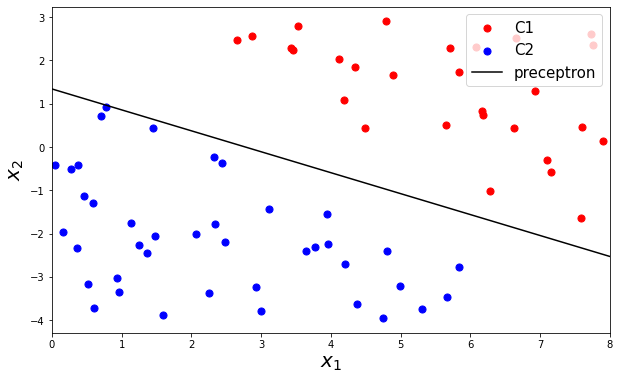

In [18]:
x1p = np.linspace(0, 8, 100).reshape(-1, 1)
x2p = -w[1, 0] / w[2, 0] * x1p - w[0, 0] / w[2, 0]

plt.figure(figsize=(10, 6))
plt.scatter(x1[C1], x2[C1], c="r", s=50, label="C1")
plt.scatter(x1[C0], x2[C0], c="b", s=50, label="C2")
plt.plot(x1p, x2p, c="k", label="preceptron")
plt.xlim([0, 8])
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$", fontsize=20)
plt.legend(loc=1, fontsize=15)
plt.show()